In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaccel as pa
import pymodels as pm
from diagnostics import calc_ellipse_equation
from injection_sim import Injection

%config Completer.use_jedi = False

# Random tests/ Utils

In [2]:
bo = pm.bo.create_accelerator()
bo_et = pa.optics.calc_edwards_teng(bo)
bo_twiss = pa.optics.calc_twiss(bo)

# TEST: create_injection_lattice 

In [3]:
injsys = Injection()
injsys.create_injection_lattice()

nlk_idx = injsys._nlk_idx

print("\n Loaded Sirius Model \n",injsys._si)
print("\n Sirius start point \n",injsys._si[0])
print('\n Sirius at nlk idx \n' ,injsys._si[nlk_idx[0]])


 Loaded Sirius Model 
 energy         : 3000000000.0 eV
harmonic_number: 864
cavity_on      : True
radiation_on   : True
vchamber_on    : True
lattice size   : 6489
lattice length : 518.3898999999926 m

 Sirius start point 
 fam_name   : InjSeptF 
pass_method: identity_pass 
hmin       : -0.03 m
hmax       : 0.012 m
vmin       : -0.012 m
vmax       : 0.012 m

 Sirius at nlk idx 
 fam_name   : InjNLKckr 
pass_method: str_mpole_symplectic4_pass 
length     : 0.45 m
nr_steps   : 31 
hmin       : -0.0095 m
hmax       : 0.0095 m
vmin       : -0.012 m
vmax       : 0.012 m


# TEST: create_initial_bunch

Bunch created with  1000  particles 



/home/facs/repos/apsuite/apsuite/emittance_exchange/injection-simulation/plots.py:53: UserWarning: No contour levels were found within the data range.
  ax[1].contour(y*1e3, y_*1e3, eqy, [0], linewidths=2)


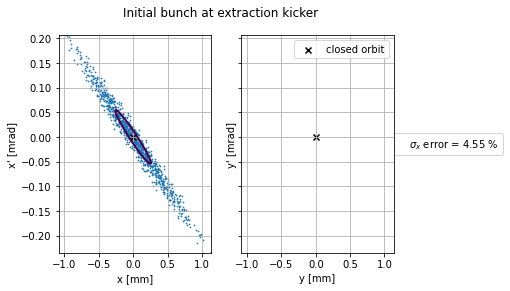

In [4]:
np.random.seed(42)
injsys.create_initial_bunch(plot=True, verbose=True)

# Test: eject_from_booster

- setting bo extraction kick to 2.461 mrad 

Particles lost at kicker to septum trajectory: 0


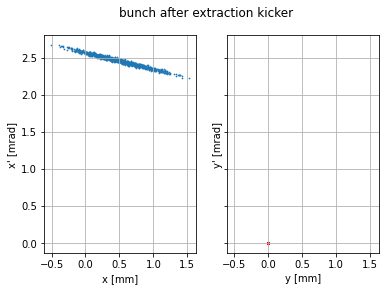

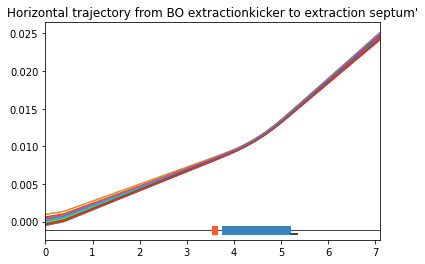

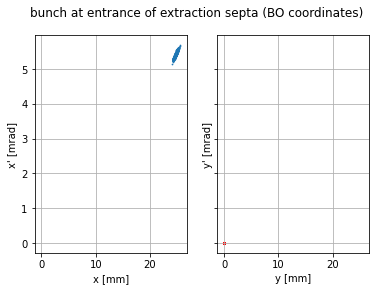

In [5]:
injsys.eject_from_booster(plot=True,verbose=True)

# Test: transport along ts

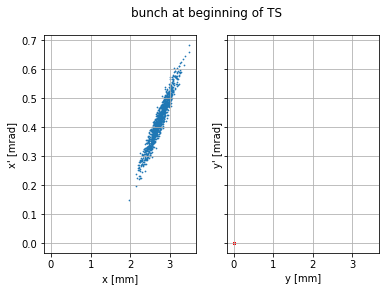

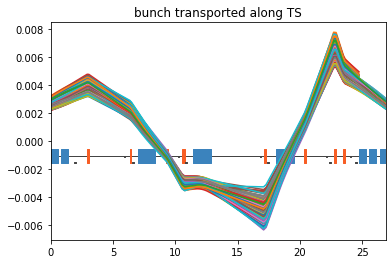

Particles losts at TS = 203


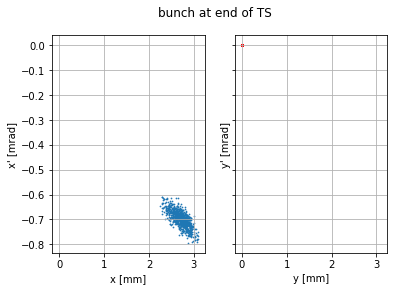

In [6]:
injsys.transport_along_ts()

## Analysis of TS line dynamics

Comparing the optical functions at the end of the booster and the begining of TS

In [7]:
print(injsys._bo_twiss[injsys._bo_ejesepta_idx[0]], "\n" )
print(injsys._ts_init_twiss)

spos          : +7.102e+00
rx, ry        : +0.000e+00, +0.000e+00
px, py        : +0.000e+00, +0.000e+00
de, dl        : +0.000e+00, +0.000e+00
mu1, mu2      : +2.210e+00, +4.993e-01
beta1, beta2  : +7.885e+00, +1.237e+01
alpha1, alpha2: -2.407e+00, +2.038e+00
eta1, eta2    : +2.127e-01, +0.000e+00
etap1, etap2  : +7.011e-02, +0.000e+00 

spos          : +0.000e+00
rx, ry        : +0.000e+00, +0.000e+00
px, py        : +0.000e+00, +0.000e+00
de, dl        : +0.000e+00, +0.000e+00
mux, muy      : +0.000e+00, +0.000e+00
betax, betay  : +7.906e+00, +1.184e+01
alphax, alphay: -2.423e+00, +1.880e+00
etax, etapx   : +2.114e-01, +6.939e-02
etay, etapy   : +0.000e+00, +0.000e+00


Checking optical functions propragated with initial twiss taked directely from the TS model 

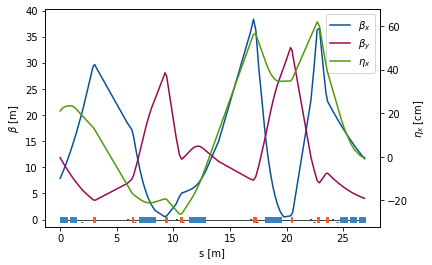

In [8]:
ts = injsys._ts 
twiss,_ = pa.optics.calc_twiss(ts, injsys._ts_init_twiss)
fig, ax = pa.graphics.plot_twiss(ts,twiss,gca=True)
ax.set_title("Default TS initial Twiss")
plt.show()

Analyzing the error of sigma through TS line:

In [9]:
from diagnostics import sigmax_error

ts_twiss,_ = pa.optics.calc_twiss(injsys._ts, injsys._ts_init_twiss)
erros_colections = []
for i in range(len(ts)):
    bunch = injsys.part_out[:, :, i]
    rel_erro, _, _  = sigmax_error(bunch, ts_twiss[i], injsys._bo_eqparams, outprint=False)
    erros_colections.append(rel_erro)
    

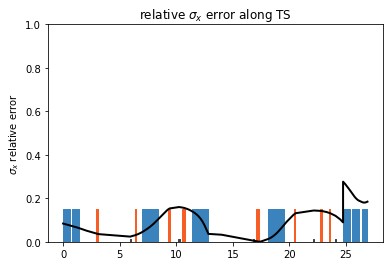

In [10]:
plt.plot(twiss.spos,erros_colections, c='k',linewidth = 2)
plt.ylim(0,1)
plt.title("relative $\sigma_x$ error along TS")
plt.ylabel("$\sigma_x$ relative error")
pa.graphics.draw_lattice(injsys._ts, height=0.3, gca=True)
plt.show()


# Test Injection no Sirius

- beam centroid at si injpoint (rx,px)(ry,py):(-16.639 mm, +2.141 mrad) (+0.000 mm, +0.000 mrad)



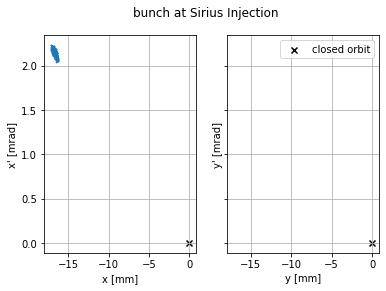

Particles losts at injection point to nlk transport = 0
- beam centroid at entrance of si nlk (rx,px):(-8.811 mm, +2.141 mrad) (+0.000 mm, +0.000 mrad)



In [11]:
injsys.inject_into_si_and_transports_to_nlk()

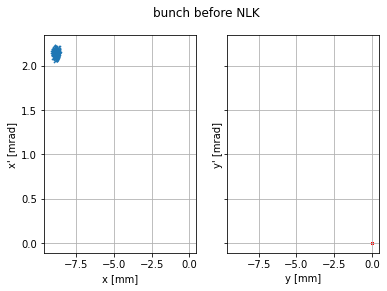

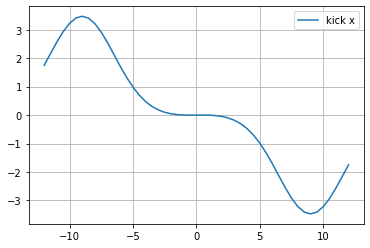

In [12]:
injsys.sets_nlk_and_kicks_beam(plot=True)

In [13]:
nlk_idx = injsys._nlk_idx
x = np.arange(-12,12,0.5)[:, None]
n = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])[None, :]
xn = x**n

(48, 9)

In [14]:
polynom = injsys._si[nlk_idx[0]].polynom_b[:, None]
polynom.shape

(14, 1)

In [21]:
kick = np.dot(xn, polynom[[2, 3, 4, 5, 6, 7, 8, 9, 10]])

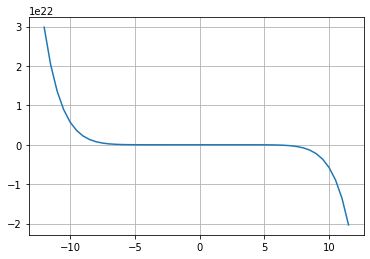

In [22]:
plt.plot(x, kick)
plt.grid(True)

In [ ]:
print(polynom)
print(injsys._LPolyB)

[[ 0.00000000e+00]
 [-1.61954041e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.54499208e+04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-5.78407290e+12]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.15681458e+20]]
[[ 0.00000000e+00  0.00000000e+00 -1.10249392e-10 -8.16644369e+03
   7.11754520e-06 -3.74392984e+07 -1.45529289e-01  1.44876000e+12
   1.18304963e+03 -5.87080304e+15 -3.32958302e+06]]
